In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
# Llamando archivo
file = '../idf/verificacionRUOA/ruoa.csv'

#Editando Nombres
nombres = np.genfromtxt(file, max_rows=1,dtype='U',delimiter=',')
for i,nombre in enumerate(nombres):
    print(i,nombre)
    
nombres[0] = 'tiempo'
nombres[1] = 'To'
nombres[2] = 'IgE'
nombres[3] = 'IgN'
nombres[4] = 'IgO'
nombres[5] = 'IgS'
nombres[6] = 'IgTecho'

0 Date/Time
1 Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)
2 ESTE:Surface Outside Face Incident Solar Radiation Rate per Area [W/m2](TimeStep)
3 NORTE:Surface Outside Face Incident Solar Radiation Rate per Area [W/m2](TimeStep)
4 OESTE:Surface Outside Face Incident Solar Radiation Rate per Area [W/m2](TimeStep)
5 SUR:Surface Outside Face Incident Solar Radiation Rate per Area [W/m2](TimeStep)
6 TECHO:Surface Outside Face Incident Solar Radiation Rate per Area [W/m2](TimeStep)


In [3]:
## LECTURA DE ARCHIVO ##

# Ruta de archivo de RUOA-Simulation
file = '../idf/verificacionRUOA/ruoa.csv'
data = pd.read_csv(file,names=nombres,skiprows=1)
# Poniendo columna de tiempo en formato de tiempo
data.tiempo = data.tiempo.str.replace('24:00:00','23:59:59')
data.tiempo = '2019-'+data.tiempo
# Índice de fecha y hora
data.tiempo = pd.to_datetime(data.tiempo,format='%Y- %m/%d %H:%M:%S')
data.set_index('tiempo',inplace=True)

# Ruta de archivo de RUOA-raw
ruoa = pd.read_csv('../002_datos/ruoafile.csv',index_col=0,parse_dates=True)

In [5]:
data

,To,IgE,IgN,IgO,IgS,IgTecho
tiempo,,,,,,
2019-01-01 00:10:00,18.4,0.0,0.0,0.0,0.0,0.0
2019-01-01 00:20:00,18.1,0.0,0.0,0.0,0.0,0.0
2019-01-01 00:30:00,18.3,0.0,0.0,0.0,0.0,0.0
2019-01-01 00:40:00,17.9,0.0,0.0,0.0,0.0,0.0
2019-01-01 00:50:00,17.7,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2019-01-02 23:20:00,19.5,0.0,0.0,0.0,0.0,0.0
2019-01-02 23:30:00,19.8,0.0,0.0,0.0,0.0,0.0
2019-01-02 23:40:00,19.6,0.0,0.0,0.0,0.0,0.0


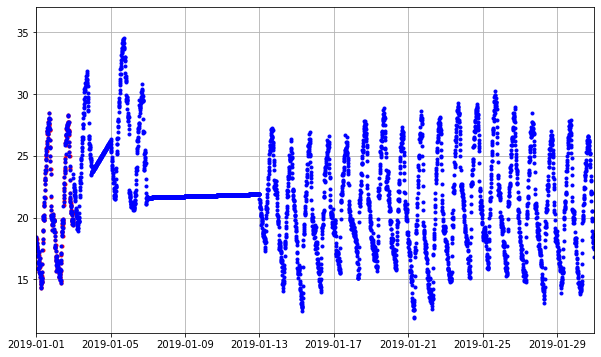

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

fecha1 = parse('2019-01-01')
fecha2 = fecha1 + pd.Timedelta('30D')
ax.set_xlim(fecha1,fecha2)

ax.plot(data.To,'.',color='red')
ax.plot(ruoa.To,'.',color='blue')

ax.grid('on')

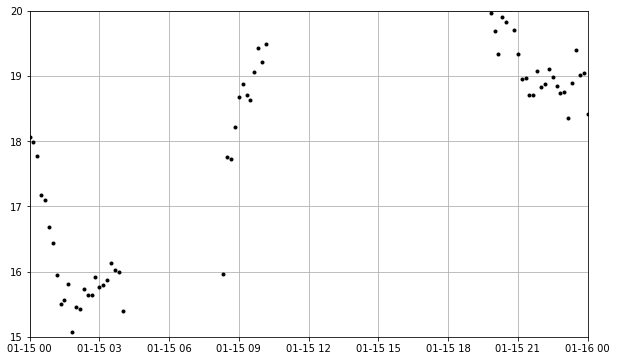

In [12]:
fig, ax = plt.subplots(figsize=(10,6))

fecha1 = parse('2019-01-15')
fecha2 = fecha1 + pd.Timedelta('1D')
ax.set_xlim(fecha1,fecha2)
ax.set_ylim(15,20)

ax.plot(data.To,'.',color='red')
ax.plot(ruoa.To,'.',color='black')
ax.grid('on')

Quedan validados los datos de RUOA